In [1]:
import geopandas as gpd
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.basemap import Basemap
import numpy as np
from datetime import datetime

import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    xmin, ymin, xmax, ymax = -20026376.39, -20048966.10, 20026376.39, 20048966.10
    xmin, ymin, xmax, ymax = -2e7, -0.75e7, 2e7, 1.5e7
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [2]:
fire_pts_folders = !ls -d ../modis_fire_points/*
shp_files = [glob(folder + '/*.shp')[0] for folder in fire_pts_folders]

In [12]:
for i,sample_file in enumerate(shp_files):
    
    print ('on file {} of {}'.format(i+1, len(shp_files)))
    df = gpd.read_file(sample_file)
    daynight = list(df.groupby('DAYNIGHT'))
    df_day = daynight[0][1]
    df_night = daynight[1][1]
    
    year = list(df_night.ACQ_DATE)[0].split('-')[0]#year
    
    ax = df_day.to_crs(epsg=3857).plot(figsize=(20,10), alpha=0.125);
    df_night.to_crs(epsg=3857).plot(figsize=(20,10), alpha=0.0125, color='r', ax=ax);
    add_basemap(ax, zoom=4)
    plt.title('Day (blue) and night (red) fire locations for year {}'.format(year))
    
    
    figname='../figs/Basemap_MODIS_DN_Global_{}'.format(year)
    plt.savefig(figname)
    plt.close()

on file 1 of 20
on file 2 of 20
on file 3 of 20
on file 4 of 20
on file 5 of 20
on file 6 of 20
on file 7 of 20
on file 8 of 20
on file 9 of 20
on file 10 of 20
on file 11 of 20
on file 12 of 20
on file 13 of 20
on file 14 of 20
on file 15 of 20
on file 16 of 20
on file 17 of 20
on file 18 of 20
on file 19 of 20
on file 20 of 20


In [23]:
del df
del daynight
del df_day
del df_night

In [3]:
df = gpd.read_file(shp_files[0])
daynight = list(df.groupby('DAYNIGHT'))
df_day = daynight[0][1]
df_night = daynight[1][1]

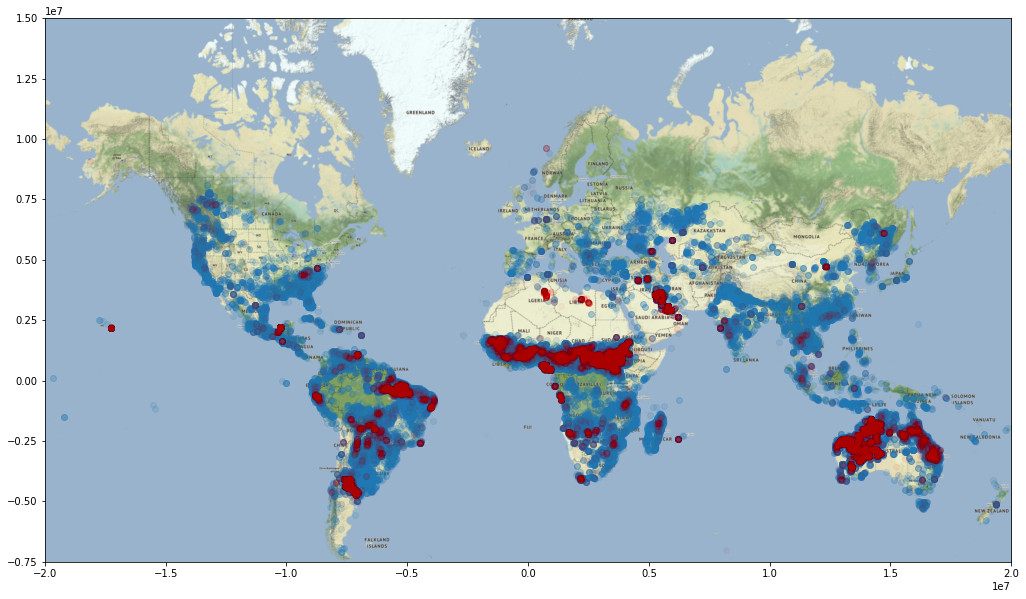

In [4]:
ax = df_day.to_crs(epsg=3857).plot(figsize=(20,10), alpha=0.125);
df_night.to_crs(epsg=3857).plot(figsize=(20,10), alpha=0.0125, color='r', ax=ax);
add_basemap(ax, zoom=4)
plt.show()

## try monthly subplots for one year

In [10]:
df = gpd.read_file(shp_files[0])
df['month'] = [int(acq.split('-')[1]) for acq in df.ACQ_DATE]
daynight = list(df.groupby('DAYNIGHT'))
df_day = daynight[0][1].to_crs(epsg=3857)
df_night = daynight[1][1].to_crs(epsg=3857)

In [22]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_no = list(range(1,13))
#for i,year in zip([10, -2], [2010, 2018]):
for i,year in zip([-3], [2018]):
    
    
    df = gpd.read_file(shp_files[i])
    df['month'] = [int(acq.split('-')[1]) for acq in df.ACQ_DATE]
    print(list(df.ACQ_DATE)[0])
    daynight = list(df.groupby('DAYNIGHT'))
    df_day = daynight[0][1].to_crs(epsg=3857)
    df_night = daynight[1][1].to_crs(epsg=3857)

    fig, axes = plt.subplots(3,4, figsize=(30,15), gridspec_kw = {'wspace':0.0, 'hspace':0.0})
    cnt=0
    for mo, month in zip(month_no, months):

        month_day_df = df_day.loc[df_day['month'] == mo]
        month_night_df = df_night.loc[df_night['month'] == mo]

        print(mo, month_day_df.shape, month_night_df.shape)

        ax1 = axes.flatten()[cnt]

        month_day_df.plot(figsize=(20,10), alpha=0.025, color='r', ax=ax1);
        month_night_df.plot(figsize=(20,10), alpha=0.0125, color='b', ax=ax1)


        add_basemap(ax1, zoom=4)

        ax1.set_xticks([])
        ax1.set_yticks([])
        ax1.set_title('{} {} fire points. Day (red), night (blue)'.format(month, year), fontsize=14)

        cnt+=1

    #     if cnt>2:
    #         break

    plt.suptitle('Monthly Fire Detections for year {}'.format(year), fontsize=18)
    plt.savefig('../figs/multi_panel_year_{}.png'.format(year))
    plt.close()

2018-01-01
1 (360468, 17) (36063, 17)
2 (198897, 17) (28278, 17)
3 (236680, 17) (30990, 17)
4 (252393, 17) (30893, 17)
5 (189157, 17) (29908, 17)
6 (279779, 17) (31445, 17)
7 (408423, 17) (66530, 17)
8 (517641, 17) (93777, 17)
9 (413501, 17) (56420, 17)
10 (253572, 17) (44840, 17)
11 (254970, 17) (37007, 17)
12 (324506, 17) (34080, 17)


In [17]:
len(shp_files)

20